<a href="https://colab.research.google.com/github/stutkhd/excercise_logistics/blob/master/TSP%E8%BF%91%E4%BC%BC%E8%A7%A3%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSP近似解法

### TSP近似解法とは
---


In [ ]:
tour = list(range(0, 10))

#描画
Gt = graph_of_tour(tour)

# 第8, 9, 10回. コンペティション用プログラム作成

## 1. 都市集合C
### 1.1 ベンチマーク問題例TSPLIBを使う場合

In [40]:
def strnum_to_num(t):
    num=t.split("e+")
    r=float(num[0])
    if len(num)==2:
        r *= 10**int(num[1])
    return r

def read_tsp_file(instance):
    if instance[:4]=="http":
        import urllib.request
        with urllib.request.urlopen(instance) as f:
            with open('tmp.txt', 'w') as g:
                print(f.read().decode(), file=g)
                instance="tmp.txt"
        
    with open(instance,"r") as f:
        for i in range(6):
            line=f.readline().rstrip("\n")        
        C={}
        for line in f.readlines():
            node=line.rstrip("\n").split()
            name=node[0]            
            if name == "EOF":
                break
            if node[0]=='NODE_COORD_SECTION':
                continue
            x,y=strnum_to_num(node[1]),strnum_to_num(node[2])
            C[name]=(x,y)
        return C
    
instance="http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/ch130.tsp"
C=read_tsp_file(instance)

### 1.2 ランダムなデータを使う場合

In [41]:
C={}
n=10
R=10000

import random
for i in range(n):
    x=random.randint(0,R)
    y=random.randint(0,R)
    C[i]=(x,y)

## 2. distanceとgraph_of_tourの定義

In [42]:
def distance(pa,pb):
    return ((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)**0.5

import networkx as nx

def graph_of_tour(tour):
    Gt=nx.Graph()

    for i in range(len(tour)):
        ci=tour[i]
        if i == len(tour)-1:
            cj=tour[0]
        else:
            cj=tour[i+1]        
        Gt.add_edge(ci,cj,weight=distance(C[ci],C[cj]))
    return Gt

## 3. アルゴリズム

提出してもらったみなさんのプログラムはtsp_solveから実行します．制限時間で止まるようしておいてください．

In [50]:
import time

#TSP近似解法
def traverse_tree(t, v, parent=None):
    L.append(v)
    for u in T[v]:
        if u != parent:
            traverse_tree(t, u, parent=v) 

def tsp_solve(C,timelimit=500):
    ''' TSPを解くためのプログラム
    input: 都市集合C, 制限時間timelimit(秒)
    output: 巡回路
    '''
    starttime=time.time()
    while time.time() - starttime < timelimit:
        tour = [i for i in C]
        G = graph_of_tour(tour)
        T = nx.minimum_spanning_tree(G)
        traverse_tree(T, 0)
        
        
    return tour
L = []
tour=tsp_solve(C, 3)
tour = L

## 4. 解tourの描画と実行可能性

size of tour: 47024.00514945696
feasibility: True


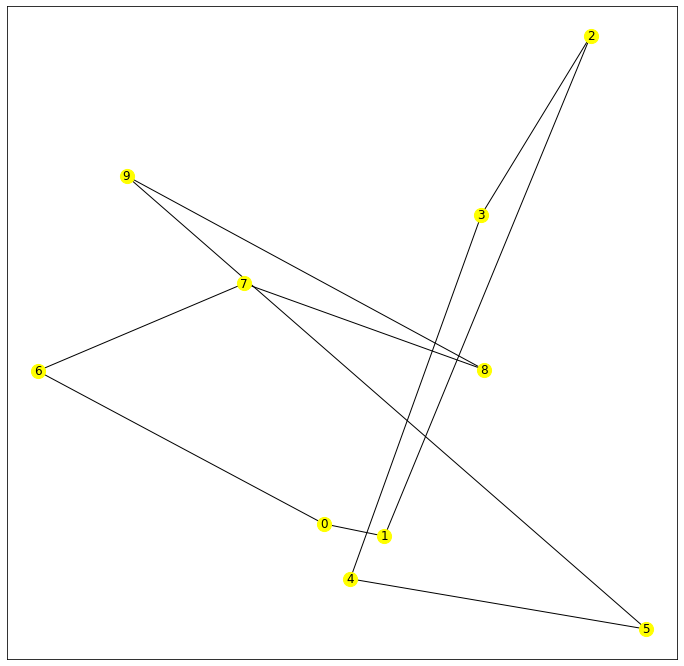

In [51]:
Gt=graph_of_tour(tour)
print('size of tour:', Gt.size(weight='weight'))
print('feasibility:',nx.is_k_edge_connected(Gt,2))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
nx.draw_networkx(Gt,pos=C,node_color="yellow",node_size=200,with_labels=True,edge_color="k",width=1,axis="equal")
plt.show() 

In [46]:
print(C)

{0: (4268, 1720), 1: (5044, 1532), 2: (7674, 9094), 3: (6281, 6393), 4: (4607, 888), 5: (8387, 127), 6: (616, 4031), 7: (3254, 5355), 8: (6318, 4050), 9: (1751, 6981)}


In [47]:
tour = [i for i in C]
tour

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [48]:
import networkx as nx

tour = [i for i in C] #node_index
G = graph_of_tour(tour)
T = nx.minimum_spanning_tree(G)
for e in T.nodes():
    print(e)


0
1
2
3
4
5
6
7
8
9


In [49]:
#木をたどる　再帰的に
#t::最小木
L = []
def traverse_tree(t, v, parent=None):
    L.append(v)
    for u in T[v]:
        if u != parent:
            traverse_tree(t, u, parent=v) 
traverse_tree(T, 0)
L

[0, 1, 2, 3, 4, 5, 9, 8, 7, 6]

[0, 1, 2, 3, 4, 9, 8, 7, 6, 5, 0, 1, 2, 3, 4, 9, 8, 7, 6, 5]